In [2]:
# !pip install langchain==0.0.191
# !pip install openai
# !pip install pandas
# !pip install scikit-learn
# !pip uninstall flaml  #version = 2.1.1
# !pip install --upgrade xgboost # 2.0.0

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    accuracy_score, 
    roc_auc_score,
    f1_score,
    matthews_corrcoef
)

import pandas as pd
import numpy as np
from collections import defaultdict
import os
from flaml import tune
from flaml import AutoML

import xgboost as xgb
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
import scipy
import re
import sys
print(sys.path)

['/Users/tushitdave/Desktop/AutomL-GPT', '/Users/tushitdave/anaconda3/envs/flaml/lib/python311.zip', '/Users/tushitdave/anaconda3/envs/flaml/lib/python3.11', '/Users/tushitdave/anaconda3/envs/flaml/lib/python3.11/lib-dynload', '', '/Users/tushitdave/anaconda3/envs/flaml/lib/python3.11/site-packages']


In LangChain, a chatbot can be configured by an `ConversationChain` object, which requires a backbone LLM, a memory object to hold conversation history, as well as a prompt template to specify the chatbot’s behavior

In [23]:
df = pd.read_csv("/Users/tushitdave/Desktop/AutomL-GPT/dataset/attrition_final.csv")
df.drop(['Unnamed: 0'] , axis = 1 , inplace = True)
first_column = df.pop('Attrition') 
df['Attrition'] = first_column 
df.head()

,Gender,OverTime,SalesDpt,JobInvCut,MiddleTraining,MoovingPeople,NotSatif,LongDisWL1,LongDis,LongDisJobS1,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction_mean,Time_in_each_comp,Income_Distance,Hrate_Mrate,Stability,Income_YearsComp,Fidelity,Attrition
0,0,1,1,0,0,1,1,0,0,0,...,-0.679146,0.245834,-1.238894,-0.774273,1.328107,-0.330471,0.223486,-0.241733,1.775509,1
1,1,0,0,1,1,0,0,0,0,0,...,-0.368715,0.806541,0.161650,1.578035,-0.451684,-0.715919,0.328996,-0.473382,-0.620450,0
2,1,1,0,1,1,1,0,0,0,0,...,-0.679146,-1.155935,0.161650,-0.755860,-0.317412,5.114320,0.000000,-0.717985,1.395198,1
3,0,1,0,0,1,0,0,0,0,0,...,0.252146,-1.155935,1.095346,0.031312,-0.342465,-0.720954,0.882920,-0.544605,-0.553896,0
4,1,0,0,0,1,1,0,0,0,0,...,-0.058285,-0.595227,-0.305198,-1.090062,-0.088277,-0.723072,1.278581,0.108800,3.106597,0


In [24]:
feature_names = defaultdict(list)
with open('/Users/tushitdave/Desktop/AutomL-GPT/dataset/attrition_features_data.txt', 'r') as f:
    for line in f.readlines():
        feature, category = line.strip().strip('.').split(': ')
        feature_names[category].append(feature)

num_feats = feature_names['continuous']
nom_feates = feature_names['descrete']

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

X_train = train.iloc[:, :-1].to_numpy()
y_train = train['Attrition'].to_numpy()

X_test = test.iloc[:, :-1].to_numpy()
y_test = test['Attrition'].to_numpy()

In [26]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification", time_budget=600, estimator_list=['xgboost'],
          log_file_name='automl.log', log_type='best')

[flaml.automl.logger: 10-09 09:59:01] {1679} INFO - task = classification
[flaml.automl.logger: 10-09 09:59:01] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 10-09 09:59:01] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-09 09:59:01] {1900} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 10-09 09:59:01] {2218} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 10-09 09:59:01] {2344} INFO - Estimated sufficient time budget=656s. Estimated necessary time budget=1s.
[flaml.automl.logger: 10-09 09:59:01] {2391} INFO -  at 0.1s,	estimator xgboost's best error=0.2316,	best estimator xgboost's best error=0.2316
[flaml.automl.logger: 10-09 09:59:01] {2218} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 10-09 09:59:01] {2391} INFO -  at 0.1s,	estimator xgboost's best error=0.2316,	best estimator xgboost's best error=0.2316
[flaml.automl.logger: 10-09 09:59:01] {2218} INFO - iteration 2, current 

[flaml.automl.logger: 10-09 09:59:13] {2391} INFO -  at 12.0s,	estimator xgboost's best error=0.0401,	best estimator xgboost's best error=0.0401
[flaml.automl.logger: 10-09 09:59:13] {2218} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 10-09 09:59:14] {2391} INFO -  at 12.8s,	estimator xgboost's best error=0.0401,	best estimator xgboost's best error=0.0401
[flaml.automl.logger: 10-09 09:59:14] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 10-09 09:59:15] {2391} INFO -  at 14.0s,	estimator xgboost's best error=0.0401,	best estimator xgboost's best error=0.0401
[flaml.automl.logger: 10-09 09:59:15] {2218} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 10-09 09:59:16] {2391} INFO -  at 14.6s,	estimator xgboost's best error=0.0401,	best estimator xgboost's best error=0.0401
[flaml.automl.logger: 10-09 09:59:16] {2218} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 10-09 09:59:17] {2391} INFO -  at 16.0

[flaml.automl.logger: 10-09 10:01:11] {2391} INFO -  at 129.4s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:01:11] {2218} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 10-09 10:01:18] {2391} INFO -  at 137.0s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:01:18] {2218} INFO - iteration 70, current learner xgboost
[flaml.automl.logger: 10-09 10:01:21] {2391} INFO -  at 139.8s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:01:21] {2218} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 10-09 10:01:27] {2391} INFO -  at 145.9s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:01:27] {2218} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 10-09 10:01:31] {2391} INFO -  at 

[flaml.automl.logger: 10-09 10:03:56] {2391} INFO -  at 294.3s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:03:56] {2218} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 10-09 10:04:01] {2391} INFO -  at 299.5s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:04:01] {2218} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 10-09 10:04:04] {2391} INFO -  at 302.4s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:04:04] {2218} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 10-09 10:04:10] {2391} INFO -  at 308.3s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:04:10] {2218} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 10-09 10:04:14] {2391} INFO - 

[flaml.automl.logger: 10-09 10:06:46] {2218} INFO - iteration 138, current learner xgboost
[flaml.automl.logger: 10-09 10:06:48] {2391} INFO -  at 467.2s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:06:48] {2218} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 10-09 10:06:52] {2391} INFO -  at 470.9s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:06:52] {2218} INFO - iteration 140, current learner xgboost
[flaml.automl.logger: 10-09 10:06:59] {2391} INFO -  at 477.7s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:06:59] {2218} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 10-09 10:07:12] {2391} INFO -  at 491.1s,	estimator xgboost's best error=0.0224,	best estimator xgboost's best error=0.0224
[flaml.automl.logger: 10-09 10:07:12] {2218} INFO - 

ROC_AUC score: 0.997
f1 score: 0.900
Accuracy: 96.94%
Precision: 100.00%
Detection rate: 81.82%
False alarm rate: 0.0%
MCC: 0.89


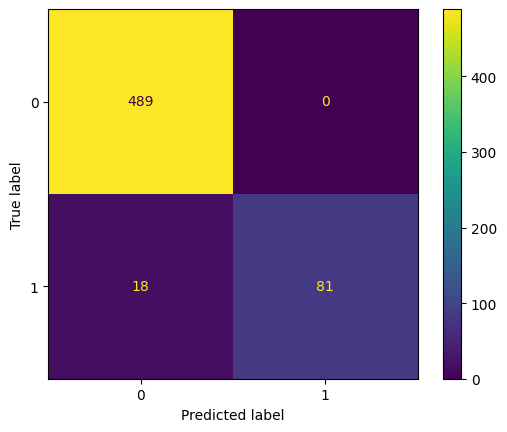

In [27]:
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)[:, 1]
metrics_display(y_test, y_pred, y_pred_proba)

In [9]:
train = pd.read_csv("/Users/tushitdave/Desktop/AutomL-GPT/LLM-guided-AutoML/dataset/train_AutoML_probe.csv")
train.rename(columns={'attack_category': 'attack'}, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,tcp,http,SF,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0


In [10]:
test = pd.read_csv("/Users/tushitdave/Desktop/AutomL-GPT/LLM-guided-AutoML/dataset/test_AutoML_probe.csv")
test.rename(columns={'attack_category': 'attack'}, inplace=True)
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
1,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
2,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
3,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0
4,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,0


In [11]:
# Feature category
feature_names = defaultdict(list)
with open('/Users/tushitdave/Desktop/AutomL-GPT/LLM-guided-AutoML/dataset/feature_types.txt', 'r') as f:
    for line in f.readlines():
        feature, category = line.strip().strip('.').split(': ')
        feature_names[category].append(feature)

# Numerical features
num_feats = feature_names['continuous']
num_feats.remove('num_outbound_cmds')

# Binary features
binary_feats = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

# Nominal features
nominal_feats = list(set(feature_names['discrete'])-set(binary_feats))

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
train[nominal_feats] = enc.fit_transform(train[nominal_feats])
test[nominal_feats] = enc.transform(test[nominal_feats])

# Separate feature/label
X_train, y_train = train.iloc[:, :-1].to_numpy(), train.iloc[:, -1].to_numpy()
X_test, y_test = test.iloc[:, :-1].to_numpy(), test.iloc[:, -1].to_numpy()

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    accuracy_score, 
    roc_auc_score,
    f1_score,
    matthews_corrcoef
)


def metrics_display(y_test, y_pred, y_pred_proba):

    # Obtain confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Output classification metrics
    tn, fp, fn, tp = cm.ravel()
    
    print(f'ROC_AUC score: {roc_auc_score(y_test, y_pred_proba):.3f}')
    print(f'f1 score: {f1_score(y_test, y_pred):.3f}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Precision: {precision_score(y_test, y_pred)*100:.2f}%')
    print(f'Detection rate: {recall_score(y_test, y_pred)*100:.2f}%')
    print(f'False alarm rate: {fp / (tn+fp)*100}%')
    print(f'MCC: {matthews_corrcoef(y_test, y_pred):.2f}')
    
    # Display confusion matrix
    # ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.5g', colorbar=False)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [14]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification", time_budget=3600, estimator_list=['xgboost'],
          log_file_name='automl.log', log_type='best')

[flaml.automl.logger: 10-08 11:28:45] {1679} INFO - task = classification
[flaml.automl.logger: 10-08 11:28:45] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 10-08 11:28:45] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-08 11:28:45] {1900} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 10-08 11:28:45] {2218} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 10-08 11:28:46] {2344} INFO - Estimated sufficient time budget=2764s. Estimated necessary time budget=3s.
[flaml.automl.logger: 10-08 11:28:46] {2391} INFO -  at 0.3s,	estimator xgboost's best error=0.0138,	best estimator xgboost's best error=0.0138
[flaml.automl.logger: 10-08 11:28:46] {2218} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 10-08 11:28:47] {2391} INFO -  at 1.8s,	estimator xgboost's best error=0.0066,	best estimator xgboost's best error=0.0066
[flaml.automl.logger: 10-08 11:28:47] {2218} INFO - iteration 2, current

[flaml.automl.logger: 10-08 11:30:33] {2218} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 10-08 11:30:42] {2391} INFO -  at 116.6s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 11:30:42] {2218} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 10-08 11:31:10] {2391} INFO -  at 144.6s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 11:31:10] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 10-08 11:31:17] {2391} INFO -  at 151.5s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 11:31:17] {2218} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 10-08 11:31:41] {2391} INFO -  at 175.3s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 11:31:41] {2218} INFO - iter

[flaml.automl.logger: 10-08 12:01:46] {2218} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 10-08 12:02:57] {2391} INFO -  at 2051.9s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 12:02:57] {2218} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 10-08 12:03:20] {2391} INFO -  at 2075.1s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 12:03:20] {2218} INFO - iteration 70, current learner xgboost
[flaml.automl.logger: 10-08 12:04:26] {2391} INFO -  at 2141.3s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 12:04:26] {2218} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 10-08 12:04:53] {2391} INFO -  at 2167.6s,	estimator xgboost's best error=0.0000,	best estimator xgboost's best error=0.0000
[flaml.automl.logger: 10-08 12:04:53] {2218} INFO - 

In [17]:
# !pip install matplotlib

In [20]:
import matplotlib.pyplot as plt
# % matplotlib inline

ROC_AUC score: 0.983
f1 score: 0.000
Accuracy: 80.03%
Precision: 0.00%
Detection rate: 0.00%
False alarm rate: 0.0%
MCC: 0.00


/Users/tushitdave/anaconda3/envs/flaml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


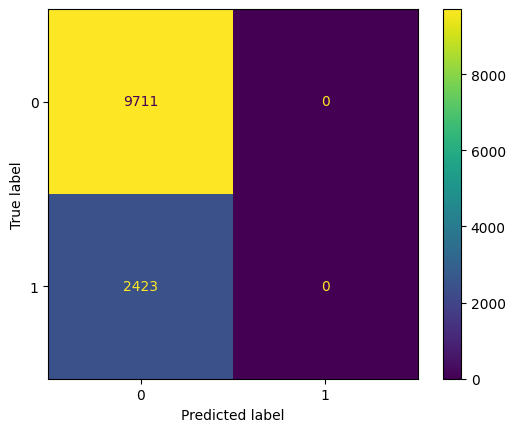

In [21]:
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)[:, 1]
metrics_display(y_test, y_pred, y_pred_proba)